# Implementing KNN






https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29


http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html


http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


https://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm

In [16]:
import numpy as np
import pandas as pd

from sklearn import preprocessing,cross_validation,neighbors
from sklearn import metrics
import matplotlib.pyplot as plt


In [17]:
url = 'D:/MIT/Semester2/Machine Learning/breast-cancer-wisconsin.data'

cancer_df = pd.read_csv(url) 

#we know from breast-cancer-wisconsin.names that 'Missing attribute values: 16'
#need to replace '?' with a nominated value which will not crash and can be filtered out.
#makes the missing data a huge outlier

cancer_df.replace('?',-9999, inplace = True)

In [18]:
#drop the id column as it does not aid prediction in any way. 
#dropping the 'id' column improves the accuracy. id values do not add value to prediction.

cancer_df.drop(['id'], 1, inplace = True)

In [19]:
#drop the 'class' column from X as we will be predicting 'class'
X = np.array(cancer_df.drop(['class'],1))

#use 'class' column for y as this is the column we want to predict.
y = np.array(cancer_df['class'])

In [20]:
parameter_columns = ['clump_thickness','unif_cell_size','unif_shell_shape','marg_adhesion','single_epith_cell_size','bare_nuclei','cland_chrom','norm_nucleoli','mitoses']
X = cancer_df[parameter_columns].values
y = cancer_df['class'].values

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the data in train and test data 

In [22]:
#split X into train/test data sets.

X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X, y, test_size = .2)

# Building and training the model with training data

In [23]:
#Classifier implementing the k-nearest neighbors
clf = neighbors.KNeighborsClassifier()

#Fit the model using X as training data and y as target value
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
#Returns the mean accuracy on the given test data and labels
accuracy = clf.score(X_test, y_test)

print("Accuracy = ", accuracy)

Accuracy =  0.992857142857


In [25]:
y_expect = y_test

#predict the class labels X for the provided data
prediction = clf.predict(X_test)

print(metrics.classification_report(y_expect,prediction))


             precision    recall  f1-score   support

          0       1.00      0.99      0.99        91
          1       0.98      1.00      0.99        49

avg / total       0.99      0.99      0.99       140



Recall refers to the completeness of the model, which means that the classification has 98 % true positives

In [26]:
#the actual data of the breast cancer wisconsin exclusing the id

print (cancer_df.head())

   clump_thickness  unif_cell_size  unif_shell_shape  marg_adhesion  \
0                5               1                 1              1   
1                5               4                 4              5   
2                3               1                 1              1   
3                6               8                 8              1   
4                4               1                 1              3   

   single_epith_cell_size bare_nuclei  cland_chrom  norm_nucleoli  mitoses  \
0                       2           1            3              1        1   
1                       7          10            3              2        1   
2                       2           2            3              1        1   
3                       3           4            3              7        1   
4                       2           1            3              1        1   

   class  
0      2  
1      2  
2      2  
3      2  
4      2  


# Finding the best number of neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predict = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, predict))

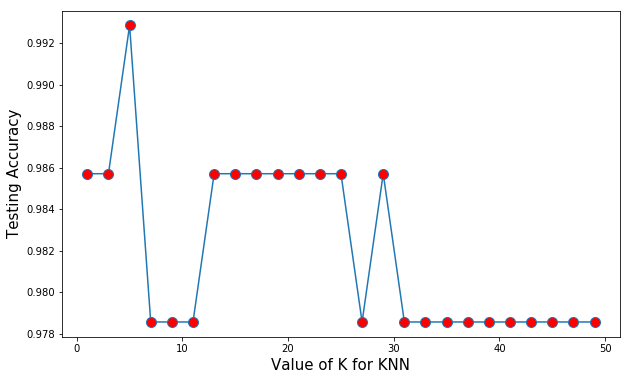

In [28]:
plt.figure()
plt.figure(figsize=(10,6))
plt.plot(k_list, scores,marker= 'o',markerfacecolor='red',markersize= 10)
plt.xlabel('Value of K for KNN', fontsize=15)
plt.ylabel('Testing Accuracy', fontsize=15)

plt.show()

In [37]:
# finding best k
MSE = [1 - x for x in scores]

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 5.


# Visualization using Principal Component Analysis

Principal component analysis (PCA) is great for finding patterns while trying to retain the variation in the data set. The artifacts of such an analysis is called principal components, which we use to try to explain as much of the variance (in the data set) as possible

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly
import plotly.graph_objs as go

%matplotlib inline

In [33]:
# Pre-process data to standardize the features. so that all the features are in equal in scale
# We will use a StandardScaler and fit it to our data and transform the data.
scaler = StandardScaler() 
scaler.fit(cancer_df)
preprocessed_data = scaler.transform(cancer_df)

In [34]:
#break down the data to 4 dimensions – so that we can visualize it. 
pca = PCA(n_components=4)
pca.fit(preprocessed_data)
decomposed_data = pca.transform(preprocessed_data)

In [35]:
# to see how each feature correlates with each principal component, we can visualize it using a heat map
plotly.offline.init_notebook_mode(connected=True)

data = go.Heatmap(z=pca.components_, 
                  x=parameter_columns, 
                  y=['PC 1', 'PC 2', 'PC 3','PC 4'], 
                  colorscale='Viridis')
 
# Plot heatmap.
plotly.offline.iplot([data], filename='heatmap')